#**Polynomial Regression**

### Lets consider another dummy data

- Here, we have 50 datapoints
- But now the data is non-linear in nature

In [1]:
# Import necessory libreary
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating a random dataset
np.random.seed(1)

X = np.random.rand(50,1)

y = 1.8*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

### Fitting Linear Regression Model

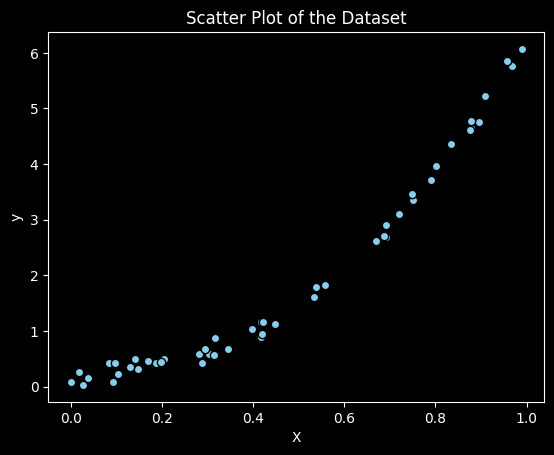

In [3]:
# Vizualize the dataset

plt.style.use('dark_background') # Use black theme
plt.scatter(X, y, color='skyblue', edgecolors='black')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of the Dataset')
plt.show()

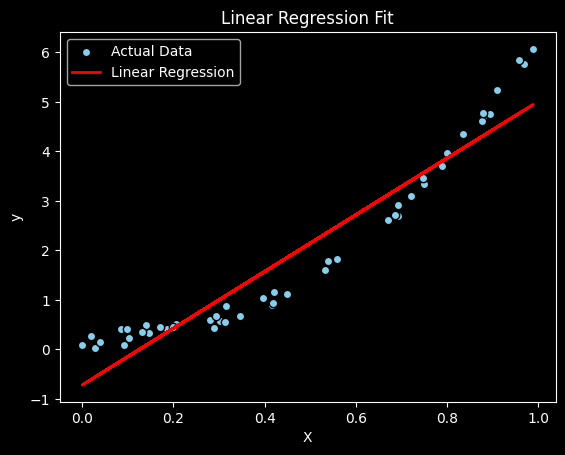

In [4]:
# Fitting a linear regression model

from sklearn.linear_model import LinearRegression # import library

model = LinearRegression()
model.fit(X, y) # Train a model

y_pred = model.predict(X)

# Plotiing the regression model
plt.style.use('dark_background')
plt.scatter(X, y, color='skyblue', edgecolors='black', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')  # Plot the regression line
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [5]:
# calculate r2 score

from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.9134496790336637


## Fitting a polinomial Regression Model with degree of polynomial 2

In [6]:
# prompt: fit a plane using regression

# Fit a plane using linear regression in 3D
from sklearn.linear_model import LinearRegression

# Reshape the data for the linear regression model
X_combined = np.concatenate((X, X**2), axis=1)
model_3d = LinearRegression()
model_3d.fit(X_combined, y)

# Predict y values using the fitted model
y_pred_3d = model_3d.predict(X_combined)

# Calculate R-squared score
r2_3d = r2_score(y, y_pred_3d)
print(f"R-squared score for the plane: {r2_3d}")

R-squared score for the plane: 0.9958051718694044


In [7]:


def adjusted_r2(r2, n, p):
  return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Calculate R-squared score
r2_3d = r2_score(y, y_pred_3d)
print(f"R-squared score for the plane: {r2_3d}")

# Calculate Adjusted R-squared
n = len(y)  # Number of observations
p = X_combined.shape[1]  # Number of predictors
adjusted_r2_3d = adjusted_r2(r2_3d, n, p)
print(f"Adjusted R-squared score for the plane: {adjusted_r2_3d}")

R-squared score for the plane: 0.9958051718694044
Adjusted R-squared score for the plane: 0.9956266685446983


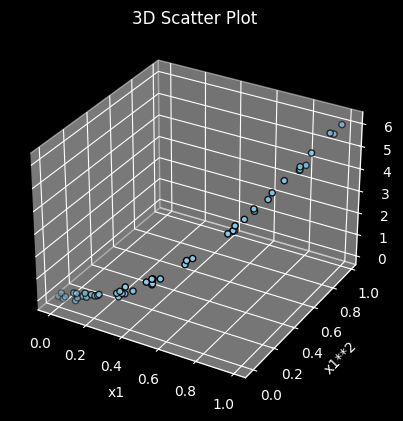

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data (replace with your actual data)
x1 = X_combined.T[0]
x2 = X_combined.T[1]

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='skyblue', edgecolors='black')

# Customize the plot (optional)
ax.set_xlabel('x1')
ax.set_ylabel('x1**2')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot')

# Display the plot
plt.show()

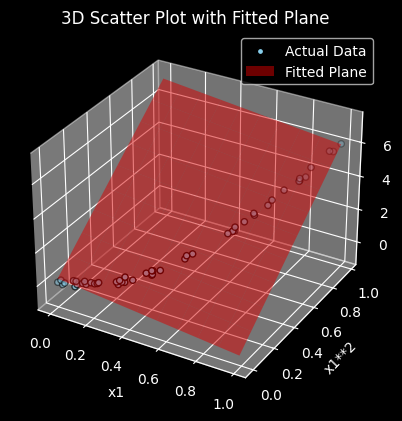

In [9]:

# Create the 3D plot with the fitted plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='skyblue', edgecolors='black', label='Actual Data')

# Generate points for the fitted plane
x1_plane = np.linspace(min(x1), max(x1), 10)
x2_plane = np.linspace(min(x2), max(x2), 10)
X1_plane, X2_plane = np.meshgrid(x1_plane, x2_plane)
Y_plane = model_3d.predict(np.column_stack((X1_plane.ravel(), X2_plane.ravel()))).reshape(X1_plane.shape)

# Plot the fitted plane
ax.plot_surface(X1_plane, X2_plane, Y_plane, alpha=0.5, color='red', label='Fitted Plane')


ax.set_xlabel('x1')
ax.set_ylabel('x1**2')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot with Fitted Plane')
ax.legend()
plt.show()

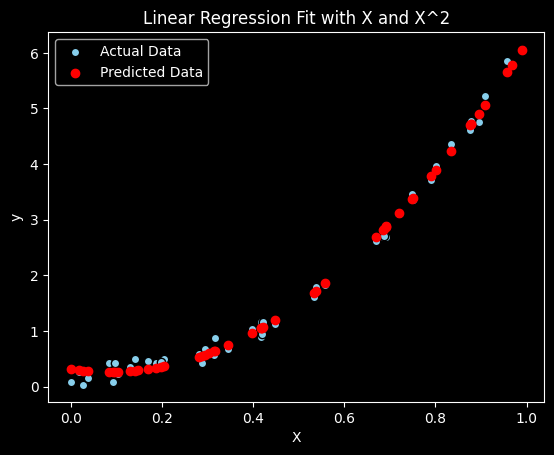

In [10]:
# Fitting a linear regression model

model = LinearRegression()
model.fit(X_combined, y) # Train a model with combined features

y_pred = model.predict(X_combined)

# Plotiing the regression model
plt.style.use('dark_background')
plt.scatter(X, y, color='skyblue', edgecolors='black', label='Actual Data')
plt.scatter(X, y_pred, color='red', label='Predicted Data') # Plot predictions
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit with X and X^2')
plt.legend()
plt.show()

In [11]:
model_3d.coef_

array([[-1.15979113,  7.03590765]])

In [12]:
model_3d.intercept_

array([0.30937917])

In [13]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

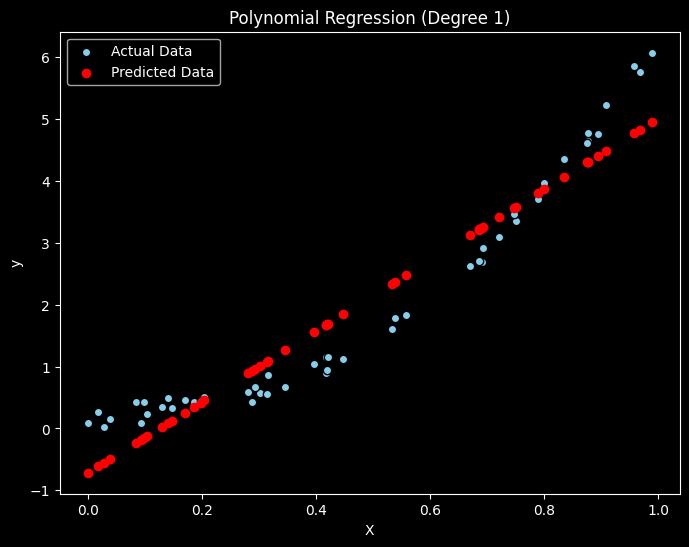

Degree 1:
  R-squared: 0.9134496790336637
  Adjusted R-squared: 0.9097666866521175


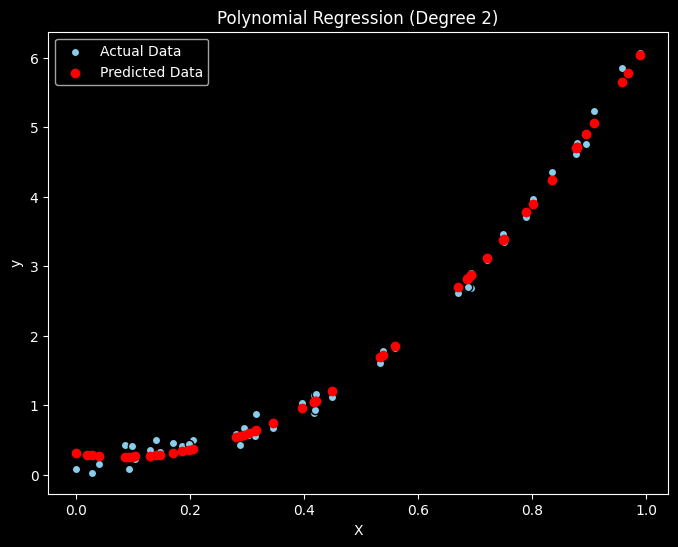

Degree 2:
  R-squared: 0.9958051718694044
  Adjusted R-squared: 0.9955315961217569


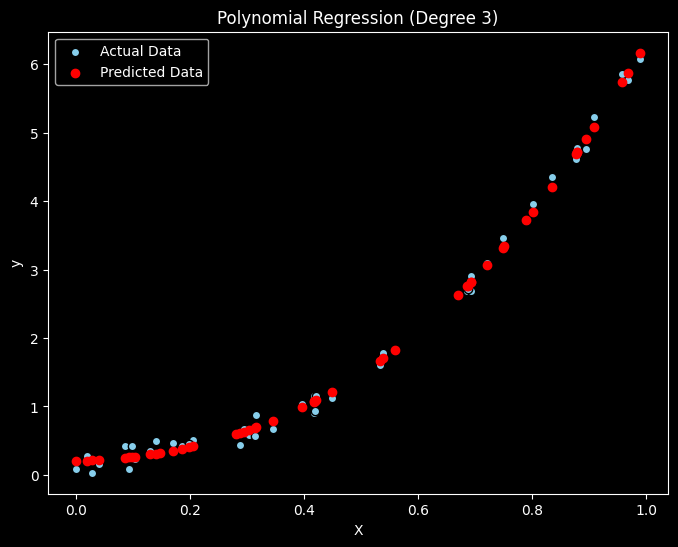

Degree 3:
  R-squared: 0.9965924098108602
  Adjusted R-squared: 0.9962895129051589


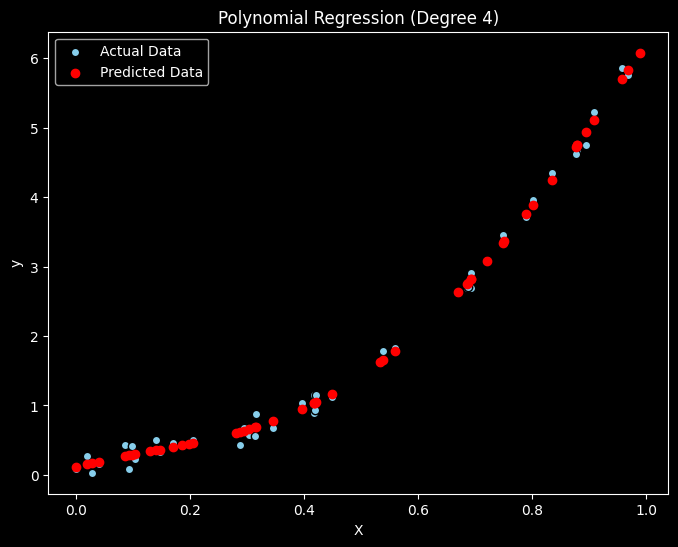

Degree 4:
  R-squared: 0.9970084685916161
  Adjusted R-squared: 0.9966685218406633


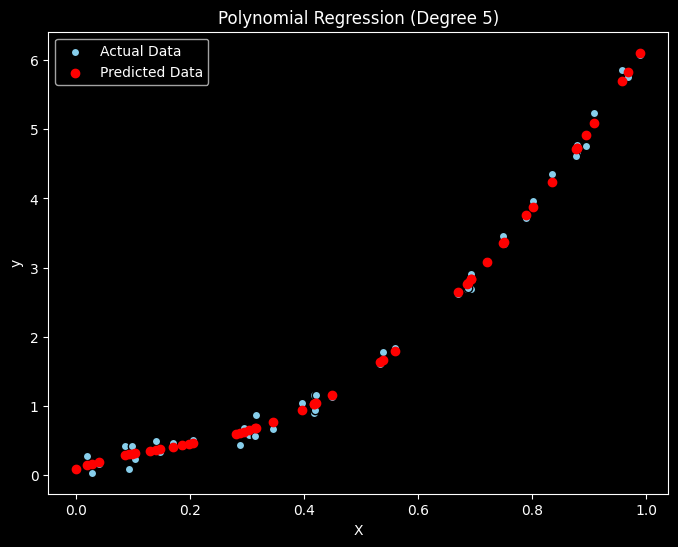

Degree 5:
  R-squared: 0.9970500852768769
  Adjusted R-squared: 0.9966384692689992


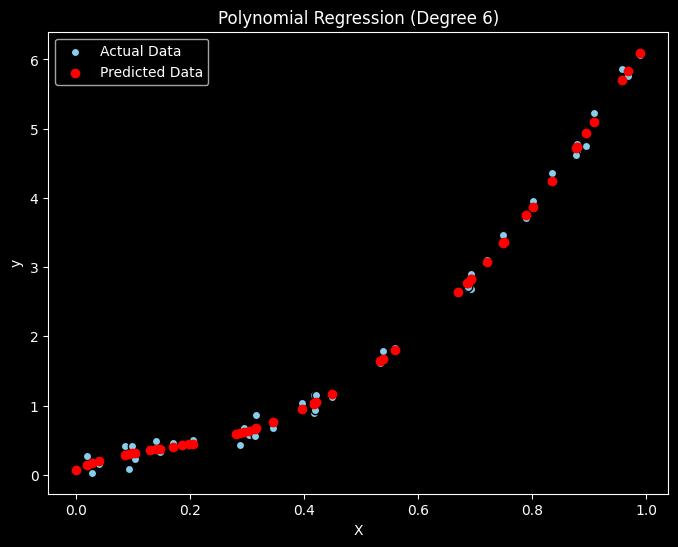

Degree 6:
  R-squared: 0.9970609916308814
  Adjusted R-squared: 0.9965711569026949


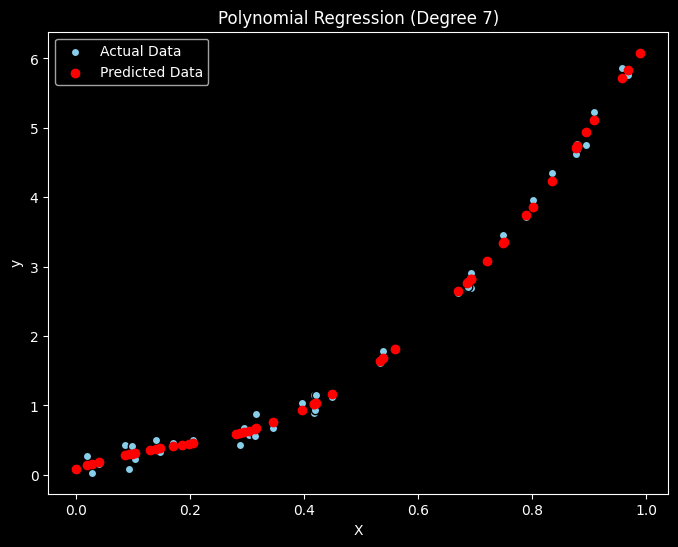

Degree 7:
  R-squared: 0.9970743495494103
  Adjusted R-squared: 0.996503490924905


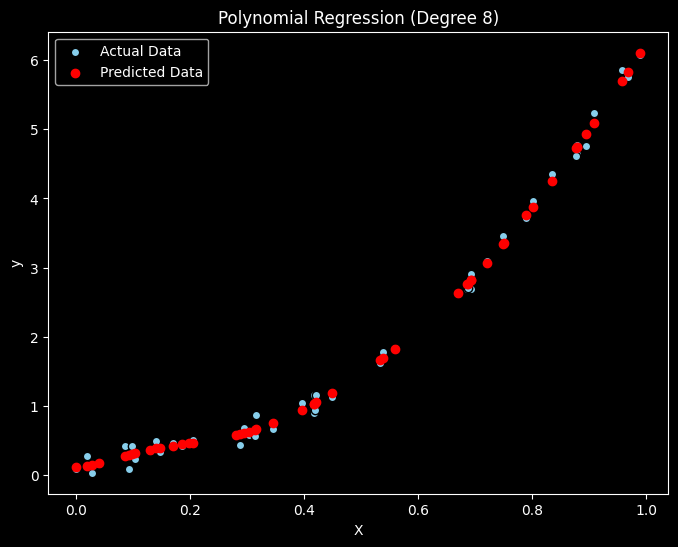

Degree 8:
  R-squared: 0.9971100044356671
  Adjusted R-squared: 0.9964597554336923


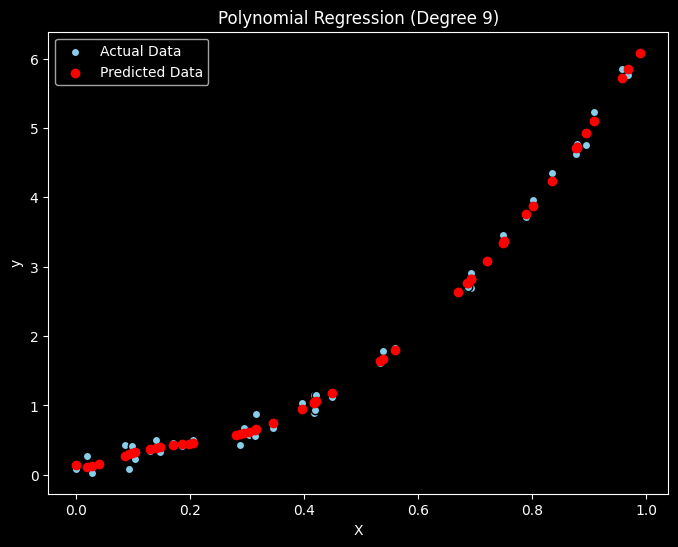

Degree 9:
  R-squared: 0.9971472949263683
  Adjusted R-squared: 0.9964158320869756


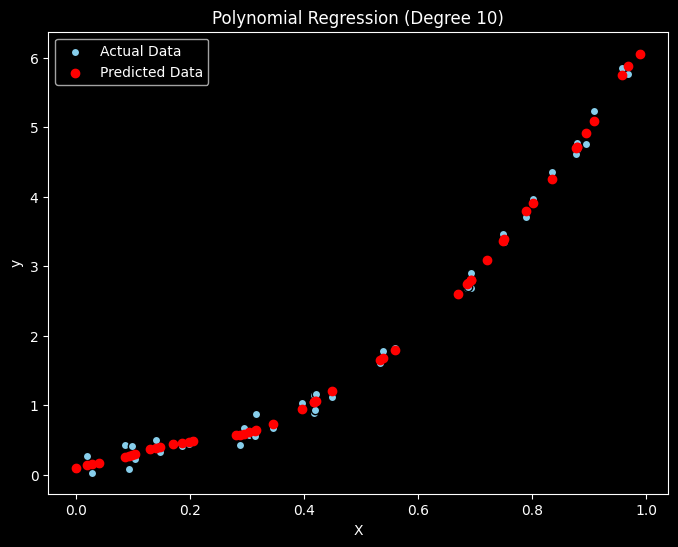

Degree 10:
  R-squared: 0.9972617079333306
  Adjusted R-squared: 0.9964690444403473


In [14]:
# prompt: create a loop for plotting the actual vs predicted graph and adjusted r2 score for polynomial feature ranging from 1 to 10

for degree in range(1, 11):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate R-squared and Adjusted R-squared
    r2 = r2_score(y, y_pred)
    n = len(y)
    p = X_poly.shape[1]
    adj_r2 = adjusted_r2(r2, n, p)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='skyblue', edgecolors='black', label='Actual Data')
    plt.scatter(X, y_pred, color='red', label='Predicted Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

    print(f"Degree {degree}:")
    print(f"  R-squared: {r2}")
    print(f"  Adjusted R-squared: {adj_r2}")